In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [2]:
df = pd.read_csv('all.csv')
df =  df.drop(['All','O+','B+','B-','A+','A-','AB+','AB-'], axis=1)


#df['formatted_date'] = df.year * 1000 + df.week_no * 10 + 0
#df['Week'] = pd.to_datetime(df['formatted_date'], format='%Y%W%w')
#f = df.drop(['year','week_no','formatted_date'], axis=1)
#df = df.sort_values(by="Week", ascending=False)
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.head()

,O-
Date,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,0


In [3]:
df.head()

,O-
Date,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,0


In [4]:
train, test = df[:-4], df[-4:]

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [6]:
n_input = 4
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [7]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
182/182 [==============================] - 6s 32ms/step - loss: 0.0172
Epoch 2/180
182/182 [==============================] - 6s 30ms/step - loss: 0.0170
Epoch 3/180
182/182 [==============================] - 4s 23ms/step - loss: 0.0170
Epoch 4/180
182/182 [==============================] - 4s 22ms/step - loss: 0.0169
Epoch 5/180
182/182 [==============================] - 4s 21ms/step - loss: 0.0169
Epoch 6/180
182/182 [==============================] - 3s 16ms/step - loss: 0.0168
Epoch 7/180
182/182 [==============================] - 3s 15ms/step - loss: 0.0169
Epoch 8/180
182/182 [==============================] - 3s 17ms/step - loss: 0.0169
Epoch 9/180
182/182 [==============================] - 3s 15ms/step - loss: 0.0169
Epoch 10/180
182/182 [==============================] - 6s 34ms/step - loss: 0.0169
Epoch 11/180
182/182 [==============================] - 5s 29ms/step - loss: 0.0169
Epoch 12/180
182/182 [==============================] - 5s 25ms/step - loss: 0.0169
E

182/182 [==============================] - 4s 20ms/step - loss: 0.0167
Epoch 99/180
182/182 [==============================] - 4s 20ms/step - loss: 0.0167
Epoch 100/180
182/182 [==============================] - 4s 19ms/step - loss: 0.0167
Epoch 101/180
182/182 [==============================] - 4s 20ms/step - loss: 0.0167
Epoch 102/180
182/182 [==============================] - 4s 20ms/step - loss: 0.0166
Epoch 103/180
182/182 [==============================] - 4s 20ms/step - loss: 0.0167
Epoch 104/180
182/182 [==============================] - 4s 21ms/step - loss: 0.0167
Epoch 105/180
182/182 [==============================] - 3s 19ms/step - loss: 0.0167
Epoch 106/180
182/182 [==============================] - 4s 20ms/step - loss: 0.0168
Epoch 107/180
182/182 [==============================] - 4s 20ms/step - loss: 0.0167
Epoch 108/180
182/182 [==============================] - 4s 21ms/step - loss: 0.0167
Epoch 109/180
182/182 [==============================] - 4s 20ms/step - loss: 0.

In [8]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [9]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_predict.head(15)

#df.reset_index(inplace=True)
#df_predict.reset_index(inplace=True)
#df_predict.head(3)

,Prediction
Date,
2020-01-01,53.812509
2020-01-02,54.165993
2020-01-03,49.070563
2020-01-04,53.799701


In [10]:
df.head(12)

,All
Date,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,38
2017-01-06,77
2017-01-07,38
2017-01-08,63
2017-01-09,61


In [11]:
df_test = pd.concat([df,df_predict], axis=1)

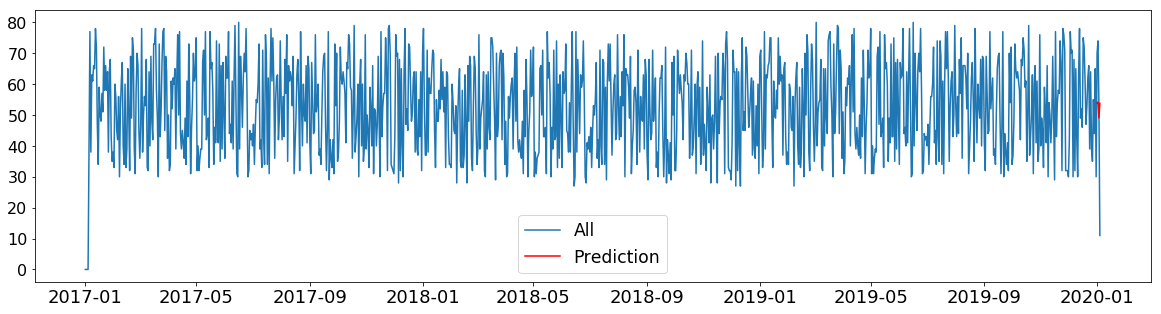

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['O-'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [13]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [25.01338431]


In [14]:
train = df

n_input = 4
n_features = 1

scaler.fit(train)
train = scaler.transform(train)

generator = TimeseriesGenerator(train,train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:],[[pred_list[i]]], axis = 1)

Epoch 1/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0311
Epoch 2/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0309
Epoch 3/180
183/183 [==============================] - 2s 14ms/step - loss: 0.0311
Epoch 4/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0310
Epoch 5/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0309
Epoch 6/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0308
Epoch 7/180
183/183 [==============================] - 3s 14ms/step - loss: 0.0306
Epoch 8/180
183/183 [==============================] - 3s 17ms/step - loss: 0.0306
Epoch 9/180
183/183 [==============================] - 3s 19ms/step - loss: 0.0306
Epoch 10/180
183/183 [==============================] - 4s 24ms/step - loss: 0.0308
Epoch 11/180
183/183 [==============================] - 4s 21ms/step - loss: 0.0308
Epoch 12/180
183/183 [==============================] - 3s 19ms/step - loss: 0.0306
E

In [15]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0,5) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates

,All
2020-01-11,NaN
2020-01-18,NaN
2020-01-25,NaN
2020-02-01,NaN


In [16]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)
df_proj.index.name = 'Date'


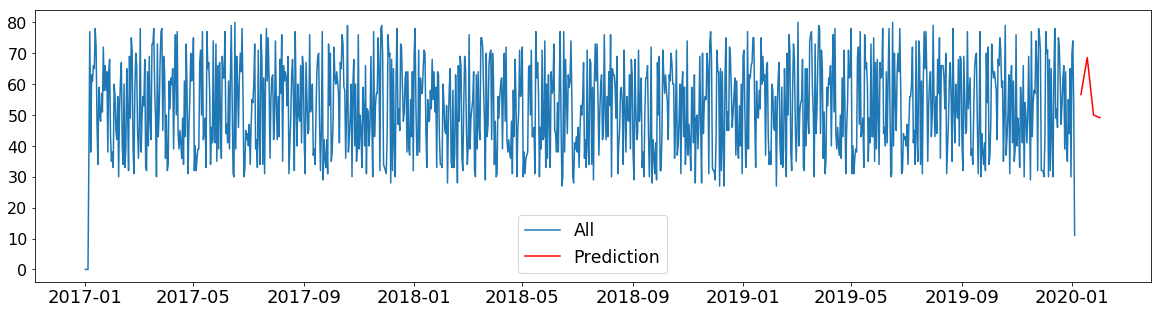

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['O-'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [18]:
print(df_proj)
df_proj.index.name ='Date'
df_proj.reset_index(inplace=True)
print(df_proj)
df_proj['Date'].to_list()

             All  Prediction
Date                        
2017-01-01   0.0         NaN
2017-01-02   0.0         NaN
2017-01-03   0.0         NaN
2017-01-04   0.0         NaN
2017-01-05  38.0         NaN
2017-01-06  77.0         NaN
2017-01-07  38.0         NaN
2017-01-08  63.0         NaN
2017-01-09  61.0         NaN
2017-01-10  66.0         NaN
2017-01-11  65.0         NaN
2017-01-12  78.0         NaN
2017-01-13  72.0         NaN
2017-01-14  47.0         NaN
2017-01-15  34.0         NaN
2017-01-16  59.0         NaN
2017-01-17  50.0         NaN
2017-01-18  48.0         NaN
2017-01-19  57.0         NaN
2017-01-20  51.0         NaN
2017-01-21  72.0         NaN
2017-01-22  58.0         NaN
2017-01-23  66.0         NaN
2017-01-24  58.0         NaN
2017-01-25  64.0         NaN
2017-01-26  38.0         NaN
2017-01-27  64.0         NaN
2017-01-28  68.0         NaN
2017-01-29  43.0         NaN
2017-01-30  35.0         NaN
...          ...         ...
2019-12-10  43.0         NaN
2019-12-11  30

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-01-13 00:00:00'),
 Timestamp('2017-01-14 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-19 00:00:00'),
 Timestamp('2017-01-20 00:00:00'),
 Timestamp('2017-01-21 00:00:00'),
 Timestamp('2017-01-22 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timestamp('2017-01-

In [19]:
df_proj['Date']=df_proj['Date'].astype(str)
x= df_proj['Date'].to_list()
x[-14:]

['2019-12-26',
 '2019-12-27',
 '2019-12-28',
 '2019-12-29',
 '2019-12-30',
 '2019-12-31',
 '2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-11',
 '2020-01-18',
 '2020-01-25',
 '2020-02-01']

In [20]:
import pickle
pickle.dump(model, open('LSTMTS.pkl','wb'))

In [21]:
model1 = pickle.load(open('LSTMTS.pkl','rb'))
print(df_predict)
#print(model.predict([[294.4631853,269.2113163,259.0677778,801.762786,10,857728.9379,2.31E+08,6.45E+07,-1.58E-04,0.318021887,0.944691378,911.1851229,115.1132337,38754.36871,125.6205738,795.0629418,769.0343165,758.783161,802.5212002,105.7078282,109.0908925,38192.10039,99.75624612,0,0,0.739668222,0.795160951,0.39753938]]))
#print(model.score(X_test,y_test))

            Prediction
2020-01-11   56.607466
2020-01-18   68.567181
2020-01-25   49.997935
2020-02-01   49.138746


In [22]:
import joblib

joblib.dump(scaler, "O-data_transformer.joblib")
model.save("O-model.h5")

In [23]:
from datetime import timedelta, date
EndDate = date.today() + timedelta(days=7)
